In [54]:
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
import glob
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
style.use('ggplot')

In [69]:
companies = pd.read_csv('companies.csv')
companies = companies.rename(columns={"Quarter end": "date"})

In [56]:
labels = companies.sector.unique()
values = companies['sector'].value_counts(normalize = False)

fig = go.Figure(data =[go.Pie(labels=labels, values=values)])
fig.show()

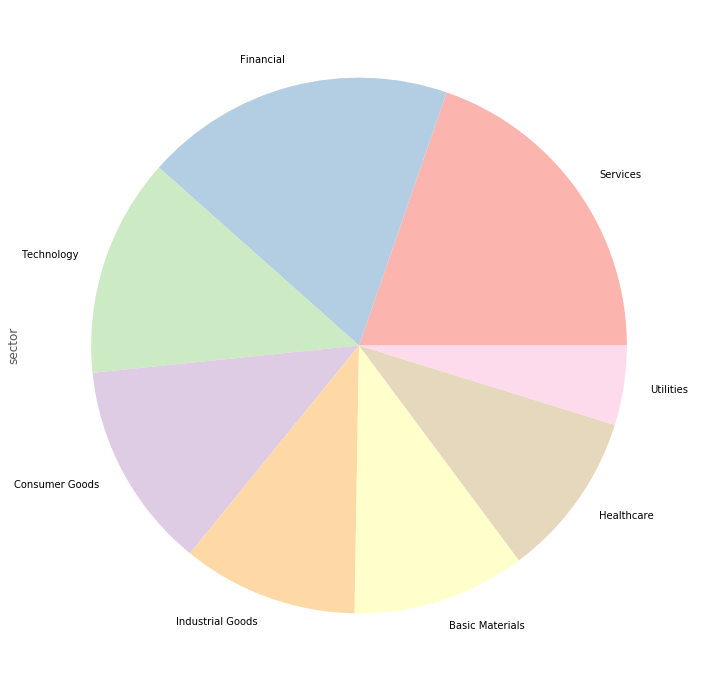

In [57]:
prob = companies['sector'].value_counts()
threshold = 0.02
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='Pie', colormap = 'Pastel1', figsize= (12,13) )
plt.xticks(rotation=25)
plt.show()

In [100]:
df = companies[['date','Price', 'symbol']]
df['date'] = pd.to_datetime(df['date'])
df.set_index("date", inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40566 entries, 0 to 40565
Data columns (total 3 columns):
date      40566 non-null object
Price     40566 non-null float64
symbol    40566 non-null object
dtypes: float64(1), object(2)
memory usage: 950.8+ KB


In [117]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index,
                         y=df['Price'][:20],
                         name="AAPL High",
                         line_color='deepskyblue'))

In [128]:
companies

,date,symbol,company,sector,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,...,growth,reported_earnings,sector_Basic Materials,sector_Consumer Goods,sector_Financial,sector_Healthcare,sector_Industrial Goods,sector_Services,sector_Technology,sector_Utilities
0,2019-04-30,A,"Agilent Technologies, Inc.",Healthcare,315993352,315993352,1.0,9.022000e+09,3.812000e+09,3.897000e+09,...,0,1,0,0,0,1,0,0,0,0
1,2019-01-31,A,"Agilent Technologies, Inc.",Healthcare,317515869,317515869,1.0,8.952000e+09,3.712000e+09,3.916000e+09,...,1,1,0,0,0,1,0,0,0,0
2,2018-10-31,A,"Agilent Technologies, Inc.",Healthcare,318533054,318533054,1.0,8.541000e+09,3.848000e+09,3.970000e+09,...,1,1,0,0,0,1,0,0,0,0
3,2018-07-31,A,"Agilent Technologies, Inc.",Healthcare,318769547,318769547,1.0,8.349000e+09,3.667000e+09,3.781000e+09,...,1,1,0,0,0,1,0,0,0,0
4,2018-04-30,A,"Agilent Technologies, Inc.",Healthcare,319952126,319952126,1.0,8.784000e+09,4.525000e+09,4.167000e+09,...,1,1,0,0,0,1,0,0,0,0
5,2018-01-31,A,"Agilent Technologies, Inc.",Healthcare,322476579,322476579,1.0,8.698000e+09,4.397000e+09,4.172000e+09,...,1,1,0,0,0,1,0,0,0,0
6,2017-10-31,A,"Agilent Technologies, Inc.",Healthcare,323018027,323018027,1.0,8.426000e+09,4.169000e+09,3.591000e+09,...,1,1,0,0,0,1,0,0,0,0
7,2017-07-31,A,"Agilent Technologies, Inc.",Healthcare,321828003,321828003,1.0,8.261000e+09,3.996000e+09,3.650000e+09,...,1,1,0,0,0,1,0,0,0,0
8,2017-04-30,A,"Agilent Technologies, Inc.",Healthcare,321337443,321337443,1.0,8.016000e+09,3.800000e+09,3.641000e+09,...,1,1,0,0,0,1,0,0,0,0
9,2017-01-31,A,"Agilent Technologies, Inc.",Healthcare,322300905,322300905,1.0,7.872000e+09,3.635000e+09,3.572000e+09,...,1,1,0,0,0,1,0,0,0,0


In [127]:
companies = px.data.gapminder().query("symbol == 'A'") 
fig = px.line(companies, x="date", y="Price", color="A",
              line_group="A", hover_name="A")
fig.show()

UndefinedVariableError: name 'symbol' is not defined

In [ ]:
gapminder = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(gapminder, x="year", y="lifeExp", color='country')
fig.show()